
# Detecção de Fraudes em Cartões de Crédito


--------------------------------



Aluna: Eliane Kelm


*Conteúdo técnico referente ao Relatório Final apresentado à PUC-Minas (Curso: Inteligência Artificial e Aprendizado de Máquina, 2022)*

---------------------------------

#### <font color = "blue"> Machine Learning Workflow </font>

`I. Business Problem` – Qual problema você está tentando resolver? 

    Prever a ocorrência de fraudes em transações utilizando cartões de crédito, 
    para isso criaremos um modelo que tenha 80% ou mais de acurácia. 

`II. Coleta e Preparação dos Dados` - Quais dados você precisa para resolver o problema?

    A fonte escolhida foi o dataset Credit Card Fraud Detection, que contém transações feitas por 
    cartões de crédito durante o mês de setembro de 2013 por titulares europeus de cartões de crédito.
    
    * Dataset: https://www.kaggle.com/mlg-ulb/creditcardfraud
    * 284.807 observações
    * 31 variáveis
    
    Esta é uma das etapas mais importantes e que demanda mais trabalho, pois nossos dados passarão por 
    uma análise e serão preparados e limpados para que estejam prontos para a próxima etapa.

`III. Seleção do Algoritmo` – Qual algoritmo utilizar?

        -> Modelos de Regressão Logística, 
        -> Árvore de Decisão e 
        -> SVM – Support Vector Machine.

`IV. Treinamento do Modelo`

    Os dados serão particionados em dados de treino e dados de teste, o motivo principal para a divisão é evitar 
    que ocorra vazamento de dados ou overfitting (quando nos dados de treino o modelo tem um desempenho excelente, 
    porém, quando utilizamos os dados de teste o resultado é ruim).

`V.	Teste e Avaliação do Modelo`

    Após passar por todas as etapas anteriores será feita a avaliação do modelo e escolhido o algoritmo que teve
    melhor desempenho.


## Coleta e Preparação dos Dados

In [1]:
# Importando os módulos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
 
# Importando um filtro de warning
from warnings import simplefilter

# Ignorarando futuros warnings
simplefilter(action='ignore', category=FutureWarning)

plt.style.use('ggplot')
%matplotlib inline

In [2]:
# Importando o arquivo armazenado na nuvem através do link 
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

# Carregando o dataset
df = pd.read_csv(file_path)

In [3]:
# Verificando o formato dos dados
print("Tamanho do Dataset \nrows:",df.shape[0]," columns:", df.shape[1])

Tamanho do Dataset 
rows: 284807  columns: 31


--------------------------------------------------------------------------------------------------------------------------------
A fim de conhecermos nosso DataFrame, vamos checar como são as 5 primeiras entradas através do método `head()`.

Podemos notar que os após a transformação PCA as features ficaram descaracterizadas (anônimas) e em valores numéricos. 

Todavia as colunas Time e Amount estão com seus valores originais.

Nossa variável alvo está localizada na coluna Class, onde:

   * 1 é uma transação fraudulenta;
   * 0 é uma transação comum.

In [4]:
# Verificando as primeiras linhas do dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# Verificando se existem valores ausentes
df.isnull().values.any()

False

In [6]:
# Verificando se existem valores nulos para cada variável
(df.isnull().sum() / df.shape[0])

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

* Não foram encontrados valores ausentes para nenhuma das variáveis. Podemos prosseguir.
--------------------------

In [7]:
# Informações extras
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

* As variáveis são exclusivamente numéricas;
* A variável Class é o nosso Target Vector, e está em formato binário, 0 ou 1, sendo 0 uma transação normal, e 1 uma transação fraudulenta.

-----------------------------------------------------------------------
Através do método `describe()` verificamos o resumo estatístico onde é possível confirmar que as variáveis que sofreram a Transformação PCA, não possuem uma discrepância aparente, assim como a coluna Time.

O que chama a atenção é o valor alto do desvio padrão da variável Amount, o que explica o valor máximo da mesma. Possivelmente sendo este um `outlier`. Descobriremos mais à frente.

In [8]:
# Verificando relatório com medidas estatísticas
pd.set_option("display.float", "{:.2f}".format)
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


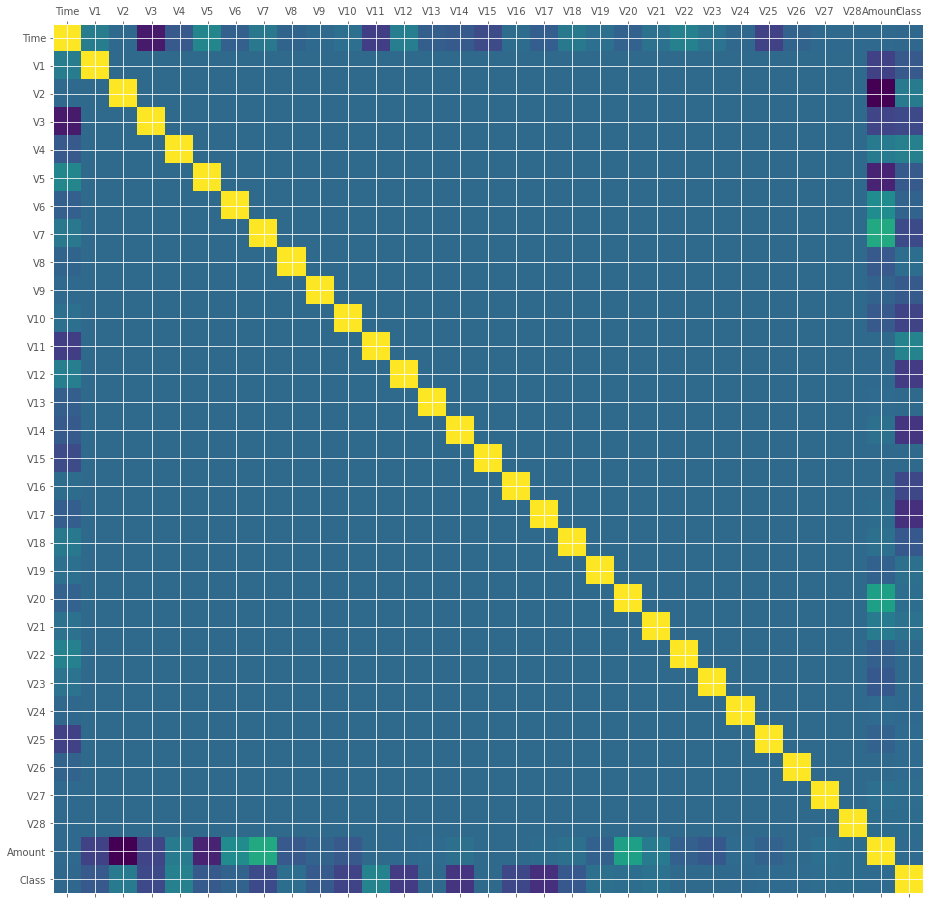

In [9]:
# Identificando a correlação entre as variáveis
# Correlação não implica causalidade
def plot_corr(df, size=16):
    corr = df.corr()
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    

# Criando o gráfico
plot_corr(df)

Este gráfico mostra a relação entre as variáveis. O que nos interessa é a correlação de uma variável com as outras, esse processo é importante porque precisamos saber quais são as variáveis mais relevantes para construir nosso modelo preditivo.

A diagonal amarela mostra uma forte correlação porque é a correlação de uma variável com ela mesma, que no caso é +1 (um).

In [10]:
# Visualizando a correlação em tabela
# Coeficiente de Correlação:
# +1 = forte correlação positiva
#  0 = não há correlação
# -1 = forte correlação negativa
df.corr()


# Os mesmos dados são mais fáceis de visualizar em tabela.

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.00,0.12,-0.01,-0.42,-0.11,0.17,-0.06,0.08,-0.04,-0.01,...,0.04,0.14,0.05,-0.02,-0.23,-0.04,-0.01,-0.01,-0.01,-0.01
V1,0.12,1.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,...,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.23,-0.10
V2,-0.01,0.00,1.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,...,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.53,0.09
V3,-0.42,-0.00,0.00,1.00,0.00,-0.00,0.00,0.00,-0.00,0.00,...,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.21,-0.19
V4,-0.11,-0.00,-0.00,0.00,1.00,-0.00,-0.00,-0.00,0.00,0.00,...,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.10,0.13
V5,0.17,0.00,0.00,-0.00,-0.00,1.00,0.00,0.00,0.00,0.00,...,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.39,-0.09
V6,-0.06,-0.00,0.00,0.00,-0.00,0.00,1.00,0.00,-0.00,0.00,...,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,0.22,-0.04
V7,0.08,-0.00,0.00,0.00,-0.00,0.00,0.00,1.00,0.00,0.00,...,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.40,-0.19
V8,-0.04,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.10,0.02
V9,-0.01,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.04,-0.10


In [11]:
# Verificando as colunas
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

--------------------------------------------------------------------
Na descrição dos dados é informado que as entradas relativas à **transações fraudulentas** representam apenas **0,17% do total**.


Vamos plotar um gráfico de barras para visualizar a essa relação.

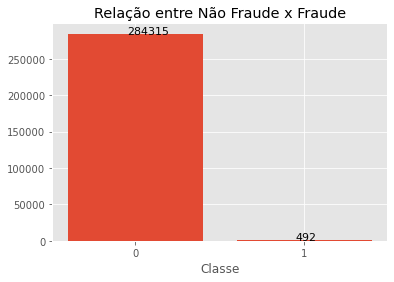

In [12]:
# Checando o balanceamento das classes

height = df.groupby('Class')['Class'].count().values
bars = df.groupby('Class')['Class'].count().index
y_pos = np.arange(len(bars))
plt.bar(y_pos, height)

# Colocando o total em cada barra
for i in range (0, len(y_pos)):
    plt.text(x = i - 0.05, y = height[i], s = height[i], size = 11)
    
plt.xticks(y_pos, bars,  fontsize = 10)
plt.title('Relação entre Não Fraude x Fraude')
plt.xlabel('Classe')

fig = plt.gcf()
plt.show()
fig.savefig('fig_class.png', format='png')

   * É nítida a discrepância entre os dados. 
   * Será nescessário fazer um balanceamento para que nosso modelo não seja prejudicado por treinar com dados desbalanceados.
    
-----------------------------------------------------------

## Análise Exploratória